# Starter point for the Machine Learning element of the coursework

This part of the coursework uses the same dataset as used in the first part of the coursework. In this part of the coursework you are going to develop three machine learning models for predicting the **'median_house_value'** from the dataset. The focus here is on comparing the different models and looking at how you can improve them. You do not need to use a cleaned up version of the data (i.e. perform outlier removal in advance) but you may if you wish although please comment on this.

Everything needed to complete this assignment should be available in the course slides, but external information from the interenet may prove useful and is encouraged. Please provide citations for resources used in the course.

### Load libraries and read in data

In [ ]:
import pandas as pd
houses = pd.read_csv('https://raw.githubusercontent.com/PaoloMissier/CSC3831-2021-22/main/IMPUTATION/TARGET-DATASETS/ORIGINAL/houses.csv', header=0)

### (Optional) Preprocessing and Data Exploration
What data exploration would you perform to get a sense of the data, and what preprocessing outside of feature normalasation would you perform? This section is an optional place for students to do additional work on the data before progressing into the assignment proper.

In [ ]:
import numpy as np
from scipy.stats import zscore

numerical_columns = houses.select_dtypes(include=[np.number])
z_scores = np.abs(zscore(numerical_columns))
threshold = 3
outlier_indices = np.where(z_scores > threshold)
houses_no_outliers = houses.drop(index=outlier_indices[0])

# Print the shape before and after removing outliers
print(f"Shape before removing outliers: {houses.shape}")
print(f"Shape after removing outliers: {houses_no_outliers.shape}")

Shape before removing outliers: (20640, 9)
Shape after removing outliers: (19748, 9)


The dataset may have outliers because of the large range, which cause extreme value to exist. Z-Score normalisation is applied to remove those kind of outliers to make the data more suitable to be trained in machine learning models later.

## Data Preparation
In this section you will perform feature selection, feature normalisation, and provide a rationale for your actions.

### Feature Selection
Think about which features may be useful in predicting **'median_house_value'**, are all features in the provided data set useful? Is a subset all that's needed? What techniques can you utilise to make this determination?

In [ ]:
houses.corr()

,median_house_value,median_income,housing_median_age,total_rooms,total_bedrooms,population,households,latitude,longitude
median_house_value,1.000000,0.688075,0.105623,0.134153,0.050594,-0.024650,0.065843,-0.144160,-0.045967
median_income,0.688075,1.000000,-0.119034,0.198050,-0.008093,0.004834,0.013033,-0.079809,-0.015176
housing_median_age,0.105623,-0.119034,1.000000,-0.361262,-0.320485,-0.296244,-0.302916,0.011173,-0.108197
total_rooms,0.134153,0.198050,-0.361262,1.000000,0.929893,0.857126,0.918484,-0.036100,0.044568
total_bedrooms,0.050594,-0.008093,-0.320485,0.929893,1.000000,0.878026,0.979829,-0.066318,0.068378
population,-0.024650,0.004834,-0.296244,0.857126,0.878026,1.000000,0.907222,-0.108785,0.099773
households,0.065843,0.013033,-0.302916,0.918484,0.979829,0.907222,1.000000,-0.071035,0.055310
latitude,-0.144160,-0.079809,0.011173,-0.036100,-0.066318,-0.108785,-0.071035,1.000000,-0.924664
longitude,-0.045967,-0.015176,-0.108197,0.044568,0.068378,0.099773,0.055310,-0.924664,1.000000


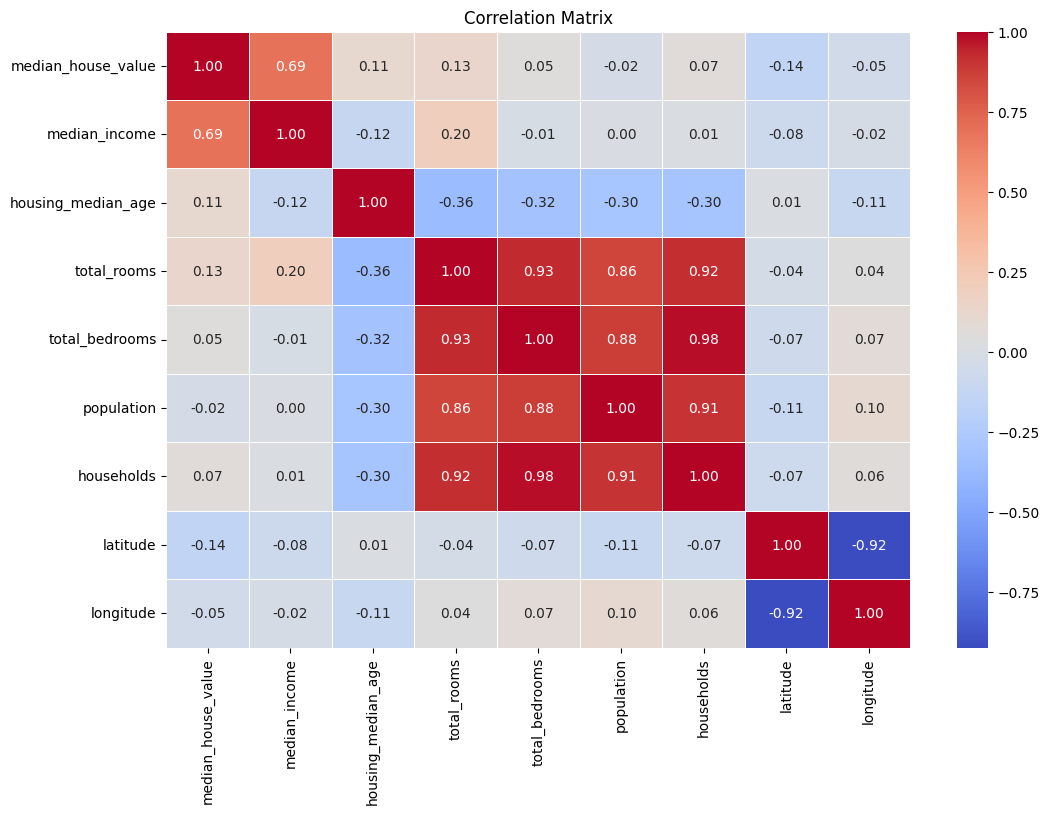

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(houses.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Matrix")
plt.show()

### Feature Normalisation
Think about what normalisation/standardisation methods you should apply to the dataset given what you understand about the raw data.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
houses_standardized = scaler.fit_transform(houses[houses.columns])
normalised_houses = pd.DataFrame(houses_standardized, columns=houses.columns)

### Rationale
Provide your rationale for both Feature Selection and Feature Normalisation here.

**Feature Selection:**<br>
To consider which features are useful for predicting the 'median_house_value' in the houses dataset, correlation analysis is applied to compute the correlation between each column and the 'median_house_value'. For correlation analysis, positive value result indicate a positive correlation, while negative value result indicate a negative correlation. From the result, 'median_income' has the highest correlation where the value is 0.69. It suggests that as the median income increases, the median house value tends to increase. Although both 'total_rooms' and 'housing_median_age' have positive value of 0.13 and 0.11, the value are much smaller than 'median_income' indciating that there are still some relationship but are not strong enough for prediction. For the 'households', 'total_bedrooms, and 'population' columns, they have moderate to strong positive and negative correlations with 'total_rooms' and 'housing_median_age', suggesting they have impact on predicting 'median_house_value'. For 'longitude', and 'latitude' columns, they have correlations of near 0 with all other columns, suggesting that their value has no impact on predicting the target value. Therefore, 'total_rooms', 'housing_median_age', 'households', 'total_bedrooms, and 'population' columns are used for predicting 'median_house_value'.

Training predictive models using different subsets of features can utilise the determination. For example, finding the mean squared error and R-squared value. By using the result, we can compare the performance of models with different feature subsets to identify which set of features provide the best results. After that we can determine whether a subset is enough or not for the prediction.

**Feature Normalisation:**<br>
Z-score standardisation is applied to normalise the data because different columns in the houses dataset have different scales. It can ensure that all features are scaled to a common scale, making them comparable. It is noticable that some of the columns have large range, for example, the 'total_rooms' column has minimum of 2 and maximum of 39320. ALso, it transforms data into a consistent, standard format, making it easier for machine learning.

## Train, Validate, Test Split
In this section you will perform a train, validate, test split utilisation the knowledge learned in class and provide a rationale for your actions.

### Perform Data Split
Utilise the information from class or online to split your data into train, validate, and test partitions.

In [ ]:
from sklearn.model_selection import train_test_split

# selected_features = ['median_income', 'total_rooms', 'housing_median_age']
# X = normalised_houses[selected_features]
X = normalised_houses.drop(['median_house_value', 'longitude', 'latitude'], axis=1)
y = normalised_houses['median_house_value']

X_train_temp, X_test, y_train_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train_temp, y_train_temp, test_size=0.5, random_state=42)

### Rationale
Provide a rationale for how you made your train, test, split decision.

As mentioned in the feature selection section, 'total_rooms', 'housing_median_age', 'households', 'total_bedrooms, and 'population' columns has relatively high and positive correlation with 'median_house_value', all these columns are used to predict 'median_house_value' value. The variable 'X' is for the feature matrix and 'y' is for the target variable. All the columns used for predicting 'median_house_value' are stored in 'X', and the target variable 'median_house_value' is stored in 'y'.

The data is split into a training set (X_train, y_train), a validation set (X_val, y_val), and a test set (X_test, y_test). 50% of the data is allocated for training, 20% of the data is allocated for validation, and 20% of the data is allocated for testing.

## Metric Selection
In this section your will make appropriate metric selection for analysing your models and provide a rationale.

### Select Appropriate Metrics
Think about the models you are building, and what the appropriate metrics and scoring should be for those models.

Linear Regression, Support Vector Machine (SVM) Regressor, and Random Forest Regressor models are built for predicting the value of 'median_house_value'. Linear regression models the relationship between a dependent variable and one or more independent variable with linear equation. Support Vector Machine (SVM) Regressor finds the hyperplane that best fits the data, and aims to minimize the error between the predicted and actual values. Random Forest Regressor builds a lot of decision trees during training and displays the average prediction of the individual trees for regression tasks.

For all Linear Regression, Support Vector Machine (SVM) Regressor, and Random Forest Regressor models, the Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R-squared (R2) are appropriate for metrics. 'Neg_mean_squared_error' is appropriate to be used for scoring in the GridSearchCV, where 'neg' indicates that the metric is being minimized.

### Rationale
Provide a rationale for your metrics and scoring selection.

**Metrics**

Firstly, for Mean Squared Error (MSE), it measures the average squared difference between predicted and actual values. It provides a comprehensive evaluation of prediction accuracy of each model used. The smaller the value of MSE, the better the predictive performace of the model.

For Root Mean Squared Error (RMSE), it is the square root of MSE, and it is used for understanding the average magnitude of errors in the same units as the target variable. Smaller value of RMSE indicates that the prediction is closer to the actual value.

For R-squared (R2), it represents the proportion of the variance in the target variable ('median_house_value') that is predictable from the independent variables. The higher the R2 value, the better the model explains the data.

**Scoring**<br>
For the 'neg_mean_squared_error' in GridSearchCV, it aims to maximize the scoring function, so using the negative MSE is suitable because lower MSE values indicates the prediction is better. Hence, it improves the model performance.

## Machine Learning Model 1
In this section your will select an appropriate machine learning model for predicting **'median_house_value'**, apply it to the dataset to perform this prediction on the test set created in the Train, Validate, Test Split section, and comment on the predictive ability of the model you selected.

### Select and Build a Machine Learning Model 1
Think about the task at hand, and select an appropriate model to build on the train and validate data. Try different sets of hyper-parameters to improve your model.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

linear_reg_model = LinearRegression()
param_grid = {'fit_intercept': [True, False]}
grid_search = GridSearchCV(estimator=linear_reg_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print(f'Best Hyperparameters: {best_params}')

best_linear_reg_model = LinearRegression(**best_params)
best_linear_reg_model.fit(X_train, y_train)

y_train_pred = best_linear_reg_model.predict(X_train)

mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_train_pred)
print(f'--- Training Set Results ---')
print(f'Best Hyperparameters: {best_params}')
print(f'Root Mean Squared Error on Training Set: {round(rmse_train, 3)}')
print(f'Mean Squared Error on Training Set: {round(mse_train, 3)}')
print(f'R-squared on Training Set: {round(r2_train, 3)}')

y_val_pred = best_linear_reg_model.predict(X_val)

mse_val = mean_squared_error(y_val, y_val_pred)
rmse_val = np.sqrt(mse_val)
r2_val = r2_score(y_val, y_val_pred)
print(f'Root Mean Squared Error on Validation Set: {round(rmse_val, 3)}')
print(f'Mean Squared Error on Validation Set: {round(mse_val, 3)}')
print(f'R-squared on Validation Set: {round(r2_val, 3)}')


Best Hyperparameters: {'fit_intercept': False}
--- Training Set Results ---
Best Hyperparameters: {'fit_intercept': False}
Root Mean Squared Error on Training Set: 0.654
Mean Squared Error on Training Set: 0.428
R-squared on Training Set: 0.566
Root Mean Squared Error on Validation Set: 0.66
Mean Squared Error on Validation Set: 0.436
R-squared on Validation Set: 0.574


### Use Model 1 to Predict on Test Data
Use the model you've trained to predict **'median_house_value'** on the test data.

In [ ]:
# Trained model is used to predict 'median_house_value' on the test data
y_test_pred = best_linear_reg_model.predict(X_test)

mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_test_pred)

print('--- Test Set Results ---')
print(f'Root Mean Squared Error on Test Set: {round(rmse_test, 3)}')
print(f'Mean Squared Error on Test Set: {round(mse_test, 3)}')
print(f'R-squared on Test Set: {round(r2_test, 3)}')

--- Test Set Results ---
Root Mean Squared Error on Test Set: 0.664
Mean Squared Error on Test Set: 0.441
R-squared on Test Set: 0.552


### Rationale
Provide a rationale for model

**Machine Learning Model 1: Linear Regression**<br>
In this section, Linear Regression model is applied to build on the train and validate data. Firstly, the Linear regression model is initialised with LinearRegression(), and hyperparameters is defined for a later grid search. Grid search, which is used for finding the best hyperparameters for the model, is applied on the training set. After obtaining the best hyperparameter from the Grid search, it is applied to create a new Linear Regression model. The new Linear Regression model is then used to train the training set. Prediction is then made to the train, validate, and test. The Root Mean Squared Error (RMSE), Mean Squared Error (MSE), and the R-squared (R2) are calcutalued to evaluate the performance on the training and test sets.

**Hyper-parameter Tuning**<br>
With hyper-parameter tuning, where the parameter 'fit_intercept' is adjusted, the model will determine whether to calculate the intercept for the model. Tuning it can be beneficial when the relationship between features and the target variable does not require an intercept term. After tuning the hyper-parameter, it is noticable that the predictive performance of Linear Regression model has improved by comparing the RMSE, MSE and R2 value.

### Comment on Predictive Ability
Think about the metrics and scoring received from the training and testing components. Think about the generalisability and quality of your results.

**Table of result of Root Mean Squared Error (RMSE), Mean Squared Error (MSE), and R-squared (R2) of different sets**<br>

Set            |   RMSE   |  MSE  |  R2
---------------|----------|-------|-------
Training Set   |   0.654  | 0.428 | 0.566  
Validation Set |   0.66   | 0.436 | 0.574   
Test Set       |   0.664  | 0.441 | 0.552   

**Analysis of the result**<br>
The output "Best Hyperparameters: {'fit_intercept': False}" indicates that the best value for the fit_intercept parameter in the linear regression model is False.

The result of the Root Mean Squared Error of the training(0.654), validation (0.66), and test (0.664) sets are quite close across the three sets, and this indicates that the explanatory ability is consistent across different datasets. The RMSE value of the test set (0.664) suggests that the model's predictions deviate by approximately 0.664 units from the actual values in the test set.


The result of the Mean Squared Error of the training(0.428), validation (0.436), and test (0.441) sets are quite close across the three sets, indicating that the model's predictive performance is consistent.

The result of the R-squared of the training(0.566), validation (0.574), and test (0.552) sets are also close to each other. This indicates that the explanatory ability is consistent across different datasets. The value of the R-squared of the test set (0.552) also suggests that the model has a moderate level of predictive power.

Overall, the model provides a moderate level of predictive performance as indicated by the moderate RMSE, MSE, and R2 values. The consistency in performance across training, validation, and test sets suggests that the model is capturing meaningful patterns in the data.

## Machine Learning Model 2
In this section your will select an appropriate machine learning model for predicting **'median_house_value'**, apply it to the dataset to perform this prediction on the test set created in the Train, Validate, Test Split section, and comment on the predictive ability of the model you selected.

### Select and Build a Machine Learning Model 2
Think about the task at hand, and select an appropriate model to build on the train and validate data. Try different sets of hyper-parameters to improve your model.

In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

svm_regressor = SVR()

param_grid = {'kernel': ['linear', 'rbf'], 'C': [0.1, 1, 10], 'gamma': ['scale', 'auto']}
grid_search = GridSearchCV(estimator=svm_regressor, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print(f'\nBest Hyperparameters: {best_params}')
best_svm_regressor = SVR(**best_params)
best_svm_regressor.fit(X_train, y_train)

y_train_pred = best_svm_regressor.predict(X_train)

mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_train_pred)
print(f'--- Training Set Results ---')
print(f'Root Mean Squared Error on Training Set: {round(rmse_train, 3)}')
print(f'Mean Squared Error on Training Set: {round(mse_train, 3)}')
print(f'R-squared on Training Set: {round(r2_train, 3)}')

y_val_pred = best_svm_regressor.predict(X_val)

mse_val = mean_squared_error(y_val, y_val_pred)
rmse_val = np.sqrt(mse_val)
r2_val = r2_score(y_val, y_val_pred)
print(f'--- Validation Set Results ---')
print(f'Root Mean Squared Error on Validation Set: {round(rmse_val, 3)}')
print(f'Mean Squared Error on Validation Set: {round(mse_val, 3)}')
print(f'R-squared on Validation Set: {round(r2_val, 3)}')


Best Hyperparameters: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
--- Training Set Results ---
Root Mean Squared Error on Training Set: 0.544
Mean Squared Error on Training Set: 0.296
R-squared on Training Set: 0.7
--- Validation Set Results ---
Root Mean Squared Error on Validation Set: 0.571
Mean Squared Error on Validation Set: 0.326
R-squared on Validation Set: 0.681


### Use Model 2 to Predict on Test Data
Use the model you've trained to predict **'median_house_value'** on the test data.

In [ ]:
y_test_pred = best_svm_regressor.predict(X_test)

mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_test_pred)
print('--- Test Set Results ---')
print(f'Root Mean Squared Error on Test Set: {round(rmse_test, 3)}')
print(f'Mean Squared Error on Test Set: {round(mse_test, 3)}')
print(f'R-squared on Test Set: {round(r2_test, 3)}')

--- Test Set Results ---
Root Mean Squared Error on Test Set: 0.57
Mean Squared Error on Test Set: 0.325
R-squared on Test Set: 0.67


### Rationale
Provide a rationale for model

**Machine Learning Model 2: Support Vector Machine(SVM)**<br>
In this section, SVM Regressor model is applied to build on the train and validate data. Firstly, the SVM Regressor model is initialised with SVR(), and hyperparameters is defined for a later grid search. Grid search, which is used for finding the best hyperparameters for the model, is applied on the training set. After obtaining the best hyperparameter from the Grid search, it is applied to create a new SVM Regressor model. The new SVM Regressor model is then used to train the training set. Prediction is then made to the train, validate, and test. The Root Mean Squared Error (RMSE), Mean Squared Error (MSE), and the R-squared (R2) are calcutalued to evaluate the performance on the training and test sets.

**Hyper-parameter Tuning**<br>
With hyper-parameter tuning, where the parameter 'kernel', 'C', and 'gamma' are adjusted, the performance of the model is improved. It is determined by comparing the result of RMSE, MSE, and R2 before and after adding hyper-parameter. The choice of kernel can significantly impact the model's ability to capture complex patterns in the data. Also, adjusting 'C' can help prevent overfitting or underfitting which can balance between decision boundaries and classifications. 'Gamma' is also adjusted to prevent overfitting and underfitting of data.

### Comment on Predictive Ability
Think about the metrics and scoring received from the training and testing components. Think about the generalisability and quality of your results.

**Table of result of Root Mean Squared Error (RMSE), Mean Squared Error (MSE), and R-squared (R2) of different sets**

Set            |   RMSE   |  MSE  |  R2
---------------|----------|-------|-------
Training Set   |   0.544  | 0.296 | 0.7  
Validation Set |   0.571  | 0.326 | 0.681   
Test Set       |   0.57   | 0.325 | 0.67   

**Analysis of the result**<br>
From the output of the Grid Search, Best Hyperparameters: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}" is the best hyperparameter in the SVM Regressor model.

The result of the Root Mean Squared Error of the training(0.544), validation (0.571), and test (0.57) sets are quite close across the three sets, and this indicates that the explanatory ability is consistent across different datasets. The RMSE value of the test set (0.57) suggests that the model's predictions deviate by approximately 0.57 units from the actual values in the test set.


The result of the Mean Squared Error of the training(0.296), validation (0.326), and test (0.325) sets are quite close across the three sets, indicating that the model's predictive performance is consistent.

The result of the R-squared of the training(0.7), validation (0.681), and test (0.67) sets are also close to each other. This indicates that the explanatory ability is consistent across different datasets. The value of the R-squared of the test set (0.67) also suggests that the model has a moderate level of predictive power.

Overall, the model provides a good level of predictive performance as indicated by the value of RMSE, MSE, and R2. The consistency in performance across training, validation, and test sets suggests that the model is capturing meaningful patterns in the data.

## Machine Learning Model 3
In this section your will select an appropriate machine learning model for predicting **'median_house_value'**, apply it to the dataset to perform this prediction on the test set created in the Train, Validate, Test Split section, and comment on the predictive ability of the model you selected.

### Select and Build a Machine Learning Model 3
Think about the task at hand, and select an appropriate model to build on the train and validate data. Try different sets of hyper-parameters to improve your model.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

random_seed = 42
rf_regressor = RandomForestRegressor(random_state=random_seed)

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print(f'Best Hyperparameters: {best_params}')
best_rf_regressor = RandomForestRegressor(**best_params, random_state=random_seed)
best_rf_regressor.fit(X_train, y_train)

y_train_pred_rf = best_rf_regressor.predict(X_train)

mse_train_rf = mean_squared_error(y_train, y_train_pred_rf)
rmse_train_rf = np.sqrt(mse_train_rf)
r2_train_rf = r2_score(y_train, y_train_pred_rf)
print(f'--- Training Set Results (Random Forest) ---')
print(f'Root Mean Squared Error on Training Set: {round(rmse_train_rf, 3)}')
print(f'Mean Squared Error on Training Set: {round(mse_train_rf, 3)}')
print(f'R-squared on Training Set: {round(r2_train_rf, 3)}')

y_val_pred_rf = best_rf_regressor.predict(X_val)

mse_val_rf = mean_squared_error(y_val, y_val_pred_rf)
rmse_val_rf = np.sqrt(mse_val_rf)
r2_val_rf = r2_score(y_val, y_val_pred_rf)
print(f'Root Mean Squared Error on Validation Set: {round(rmse_val_rf, 3)}')
print(f'Mean Squared Error on Validation Set: {round(mse_val_rf, 3)}')
print(f'R-squared on Validation Set: {round(r2_val_rf, 3)}')

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 150}
--- Training Set Results (Random Forest) ---
Root Mean Squared Error on Training Set: 0.376
Mean Squared Error on Training Set: 0.141
R-squared on Training Set: 0.857
Root Mean Squared Error on Validation Set: 0.583
Mean Squared Error on Validation Set: 0.34
R-squared on Validation Set: 0.667


### Use Model 3 to Predict on Test Data
Use the model you've trained to predict **'median_house_value'** on the test data.

In [ ]:
y_test_pred_rf = best_rf_regressor.predict(X_test)

mse_test_rf = mean_squared_error(y_test, y_test_pred_rf)
rmse_test_rf = np.sqrt(mse_test_rf)
r2_test_rf = r2_score(y_test, y_test_pred_rf)
print('--- Test Set Results (Random Forest) ---')
print(f'Root Mean Squared Error on Test Set: {round(rmse_test_rf, 3)}')
print(f'Mean Squared Error on Test Set: {round(mse_test_rf, 3)}')
print(f'R-squared on Test Set: {round(r2_test_rf, 3)}')

--- Test Set Results (Random Forest) ---
Root Mean Squared Error on Test Set: 0.58
Mean Squared Error on Test Set: 0.337
R-squared on Test Set: 0.658


### Rationale
Provide a rationale for model

**Machine Learning Model 3: Random Forest Regressor**<br>
In this section, Random Forest Regressor model is applied to build on the train and validate data. Firstly, the Random Forest Regressor model is initialised with RandomForestRegressor(), and hyperparameters is defined for a later grid search. Grid search, which is used for finding the best hyperparameters for the model, is applied on the training set. After obtaining the best hyperparameter from the Grid search, it is applied to create a new Random Forest Regressor model. The new Random Forest Regressor model is then used to train the training set. Prediction is then made to the train, validate, and test. The Root Mean Squared Error (RMSE), Mean Squared Error (MSE), and the R-squared (R2) are calcutalued to evaluate the performance on the training and test sets. The randome state is set to 42 so that same result will be generated.

**Hyper-parameter Tuning**<br>
With hyper-parameter tuning, where the parameter 'n_estimators', 'max_depth', 'min_samples_split', and 'min_samples_leaf' are adjusted, the performance of the model is improved. It is determined by comparing the result of RMSE, MSE, and R2 before and after adding hyper-parameter. 'N_estimators' is adjusted to determine the number of trees in the forest, which helps reduce overfitting and improves model accuracy. Besides, 'max_depth' changes the maximum depth of the trees, which helps prevent overfitting. 'Min_samples_split', and 'min_samples_leaf' help control overfitting by preventing the creation of nodes with too few samples.

### Comment on Predictive Ability
Think about the metrics and scoring received from the training and testing components. Think about the generalisability and quality of your results.

**Table of result of Root Mean Squared Error (RMSE), Mean Squared Error (MSE), and R-squared (R2) of different sets**

Set            |   RMSE   |  MSE  |  R2
---------------|----------|-------|-------
Training Set   |   0.376  | 0.141 | 0.857  
Validation Set |   0.583  | 0.34  | 0.667   
Test Set       |   0.58   | 0.337 | 0.658   

**Analysis of the result**<br>
From the output of the Grid Search, "{'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 150}" is the best hyperparameter in the Random Forest Regressor model.

The result of the Root Mean Squared Error of the training (0.376), validation(0.583), and test (0.58) are relatively low, indicating the model's prediction are close to the actual value. The RMSE value of the test set (0.58) suggests that the model's predictions deviate by approximately 0.58 units from the actual values in the test set.

The result of the Mean Squared Error of the training (0.141), validation(0.34), and test (0.337) are low, confirming the accuracy of the model's predictions.

The result of the R-squared of the training (0.857), validation(0.677), and test (0.658) are also quite high, indicating it explains most of the difference in the target variable well.

Overall, the model provides a good level of predictive power. The value of RMSE and R2 score suggests that the model accurate predictions with a good level of explanatory power on the test set.

## Comparison Between Models
In this section you will comment on the difference in predictive ability between models, the difference in analysis metrics between models, and the pros/cons of each model as you understand it.

### Difference in Predictive Ability
Think about what you understand if the predictive ability from each model based on scores gained, comment on the difference between each model and suggest why you believe this to be the case. Additionally comment on the difference in hyper-parameter selection between your models.

**Predictive ability of each model**<br>
The predictive ability of all the models are compared with the R-squared (R2) score. The R-squared score of Linear Regression is 0.552, SVM Regressor is 0.67, and Random Forest Regressor is 0.658. Among all the three models used, SVM Regressor has the highest R-squared score, suggesting that it has highest predictice ability. Linear Regression model has the lowest R-squared score, meaning that it has the lowest predictive ability. And for Random Forest Regressor, it has predictive level between Linear Rregression and SVM Regressor.

**Comment on the difference between model**<br>
The models' inherent capabilities may be the reason of the difference in predictive ability. For Linear Regression and SVM Regressor, they cannot capture complex relationship well, resulting in moderate predictive ability. For Random Forest Regressor, it has the ability to deal with non-linear data, and therefore can capture complex relationship bettwe and have better predictive ability.

**Comment on the difference in hyper-parameter selection**<br>
Firstly, for Linear Regression, fit_intercept with 'False' as the value is used as the hyperparameter. It is applied to determine whether to include an intercept term in the model. 'False' indicates that no intercept is used in the model. It is the simpliest model comparing with other two models as it has minimal hyperparameter tuning.

For SVM Regressor, the choice of kernel ('linear' or 'rbf'), the regularization parameter ('C'), and the kernel coefficient ('gamma') are used as the tuning hyperparameters. The kernel dictates the nature of the decision boundary, C controls regularisation, and gamma controls the kernel shape. Unlike Linear Regression, it can deal with non-linear relationship. However, the hyperparameter has to be tuned carefully to prevent overfitting and to improve performance. '{'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}' is used as the hyper-parameter.

For Random Forest Regressor, the number of trees in the forest ('n_estimators'), the number of features considered for the best split ('max_features'), and the maximum depth of the tree ('max_depth') are used as the tuning hyperparameters. Unlike Linear Regression and SVM Regressor, the maximum number of features considered for each split is specified in Random Forest Regressor, and therefore can prevent overfitting. '{'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 150}' is used as the hyper-parameter.

### Difference in Analysis Metrics
Think about the analysis metrics you received from each model, comment on the use in the difference of these metrics and suggesting which model is "better" or "worse" when comparing them.

To consider how well each model oerforms, the Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R-squared (R2) are used.

For Mean Squared Error (MSE), SVM Regressor has the lowest MSE (0.325), indicating better predictive accuracy. Linear Regression has the highest MSE (0.441), indicating worser predictive accuracy.

For Root Mean Squared Error (RMSE), Random Forest has the lowest RMSE (0.57), making it more accurate on average in predicting target values. Linear Regression has the highest RMSE (0.664), indicating it has worst performance in predicting the target values.

For R-squared (R2), Random Forest has the highest R2 (0.67), indicating a better fit to the data. Linear Regression has the lowest RMSE (0.552), indicating a worse fit to the data.

Overall, when comparing the RMSE, MSE, and R2 score, SVM Regressor has the best predictive performance than Linear Regression and SVM Regressor. Random Forest Regressor performs slightly better than Linear Regression in terms of MSE, RMSE, and R2. Linear Regression is considered as the worst model comparing with the other two models.

### Pros/Cons
Think about the models and analysis metrics you've gathered, and suggest the positives and negatives of each model.

Firstly, for Linear Regression model, its benefit is that it provides straightforward interpretability. It is quick to train and easy to implement. Its negative is that it can only deal with linear relationships, and therefore cannot capture non-linear patterns.

For SVM Regressor, its positive is that it provides higher flexibility where it can deal with non-linear relationships with the choices of kernels. Its drawback is that it is sensitive to the choice of hyperparameters, and therefore need tuning beforehand. It also requires longer training time when dealing with large and complex datasets.

For Random Forest Regressor, its upside is that it has higher predictive ability because it captures complex relationships through ensemble learning. It can also deal with non-linear relationships. Its negative is that it may overfit data, leading to longer training time. Apart from that, the ensemble nature makes it less interpretable compared to a single decision tree becuase it does not provide complete visibility into the coefficients.

## Conclusion
In this section you will draw conclusions about the models you've selected, and efficacy of different analysis metrics you've used, and any additional comments or concerns about the models or metrics you've observed.

### Model Selection
Think about all of the information you've learned both theoretically from the slides and practically through completing this assingment about the models you've selected. What conclusions can you draw about the models, and what situations would you pick one model over another?

Each model has its own upsides and downsides. Linear Regression is simplier and faster but cannot deal with non-linear relationships, SVM Regressor has higher flexibility but is more sensitive to the hyperparameters. Random Forest Regressor has higher predictive ability but takes longer to train. To decide which model has best predictive ability, the Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R-squared (R2) are calculated and used for comparison. After comparing the MSE, RMSE, and R2 scores, SVM Regressor has the best predictive ability while Random Forest Regressor and Linear Regression has moderate and worst predictive ability respectively.

With hyper-parameter tuning, the predictive performance of Linear Regression, SVM Regressor, and Random Forest Regressor have improved. Therefore hyper-paramater tuning is applied to all of the models to have a better prediction result.

When the relationship between features and the target is approximately linear, it is suitable to use Linear Regression. If the data has complex and non-linear pattern, and is tuning feasible, it is suitable to use SVM Regressor. If the data has complex and non-linear pattern, and the accuracy of prediction is prioritised, it is suitable to use Random Forest Regressor.

### Analysis Metrics
Think about the metrics you've selected and what you've learned both thetoretically from the slides and practically through this assignment. What conclusions can you draw about these metrics, and what situations might you pick one set of metrics over another? (Here you may comment on metrics which you have not selected in this assignment)

Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R-squared (R2) are the matrics used for each model. MSE measures the average squared difference between predicted and actual values, RMSE is the square root of the MSE, which measures the original unit of the target variable, and R2 measures the proportion of the variance in the dependent variable that is predictable from the independent variables.

There are situations where each of the metrics should be chosen. If the main concern is outlier sensitivity and error magnitude, MSE should be chosen. If interpretability, where  easily interpretable metric in the same unit as the target variable is needed, RMSE should be chosen. If we want to assess the proportion of variance in the dependent variable explained by the model, R2 should be chosen.

### Any Additional Conclusions
For those of you which have noticed things or made conclusions which do not neatly fit into any other section, please put them here.

The result of metrics of all the Linear Regression, SVM Regressor, and Random Forest Regressor models suggest that all of them perform well. However, for Linear Regression, its simplicity may limit capturing complex patterns. SVM Regressor has good perdictive ability, but Random Forest Regressor outperforms it as it has lower RMSE, MSE, and higher R2.

Before normalising the data and put it in models for training, outlier detection is taken place to remove outliers. In the code above, Z-score standardisation is applied. The reason why Z-score standardisation is picked because the dataset has large range, and extreme value may exist. It measures how many standard deviations a data point is from the mean, and these data point is treated as outliers and are removed. However, the result of metrics (RMSE, MSE, R2) are worse when outliers detection is performed, and therefore the dataset without removing outliers are used in each model.

Apart from that, when considering the features for predicting 'median_house_value', different subsets are tried. For example, the features variable only contains 'median_income' instead of including all 'median_income', 'total_rooms', and 'housing_median_age'. However, the result of using only 'mediab_income' has worse result than using all 'median_income', 'total_rooms', and 'housing_median_age' features. Therefore, 'median_income', 'total_rooms', and 'housing_median_age' are used for predicting the value of 'median_house_value' at last.